# AutoCodificadores para la reducción de dimensionaliad

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
from sklearn.datasets import make_blobs

In [28]:
datos = make_blobs(n_samples = 300,
    n_features = 2,
    centers = 2,
    cluster_std = 1.0,
    random_state = 10)

In [29]:
X,y = datos

In [30]:
np.random.seed(seed=101)
z_ruido = np.random.normal(size = len(X))
z_ruido = pd.Series(z_ruido)

In [31]:
features = pd.DataFrame(X)
features = pd.concat([features, z_ruido],
                     axis = 1)
features.columns = ['X1', 'X2', 'X3']

In [32]:
features.head()

,X1,X2,X3
0,1.732255,4.922483,2.706850
1,5.779890,-9.792240,0.628133
2,4.754389,-9.479149,0.907969
3,4.740197,-9.037017,0.503826
4,5.671027,-9.762260,0.651118


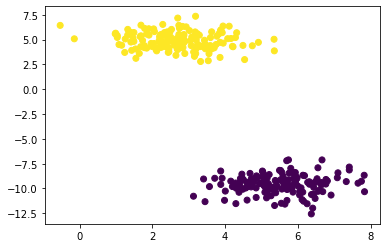

In [33]:
# Utilizando MatPlotLib
plt.scatter(features['X1'], 
            features['X2'],
            c = y) # Usar la y para color

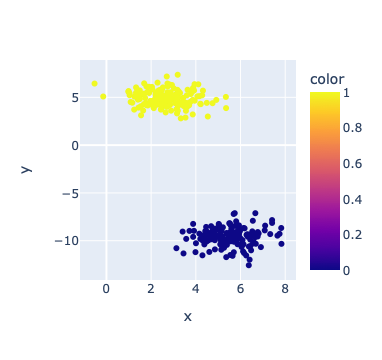

In [34]:
# Utilizando Plotly Express
fig = px.scatter(x = features['X1'], 
                 y = features['X2'], 
                 color = y)
fig.show()

Para graficar con MatPlotLib en 3-D

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# Si se tiene la última versión de Jupyter NB
#%matplotlib notebook

%matplotlib inline

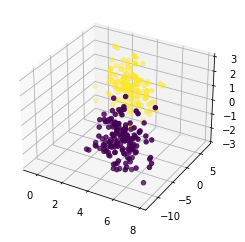

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'],
           features['X2'],
           features['X3'],
           c = y)

In [39]:
fig = px.scatter_3d(x = features['X1'], 
                    y = features['X2'], 
                    z = features['X3'],
                    color = y,
                    width = 400, height = 400)
fig.show()

# Codificador y Decodificador

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Se utilizará el optimizador *Stochastic Gradient Descent* porque permite "jugar" con la tasa de aprendizaje *lr* (learning rate)

In [41]:
from tensorflow.keras.optimizers import SGD

In [42]:
# 3 --> 2
codificador = Sequential()
codificador.add(Dense(units = 2,
                      activation = 'relu',
                      input_shape = [3]))

In [43]:
# 2 ---> 3
decodificador = Sequential()
decodificador.add(Dense(units = 3,
                        activation = 'relu',
                        input_shape = [2]))

In [44]:
# Autocodificador
# 3 ---> 2 ----> 3
autocodificador = Sequential([codificador,
                              decodificador])
autocodificador.compile(loss = "mse",
                        optimizer = SGD(lr = 1.5))

In [45]:
from sklearn.preprocessing import MinMaxScaler

Nota:  se usarán todos los datos!  No tiene sentido usar datos de entrenamiento y de prueba ya que no hay una respuesta correcta en esto.

In [46]:
escalador = MinMaxScaler()
datos_escalados = escalador.fit_transform(features)

In [47]:
#datos_escalados

In [48]:
autocodificador.fit(datos_escalados,
                    datos_escalados,
                    epochs = 5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 1ms/sample - loss: 0.1524
Epoch 2/5
300/300 [==============================] - 0s 63us/sample - loss: 0.1036
Epoch 3/5
300/300 [==============================] - 0s 69us/sample - loss: 0.1052
Epoch 4/5
300/300 [==============================] - 0s 69us/sample - loss: 0.1030
Epoch 5/5
300/300 [==============================] - 0s 64us/sample - loss: 0.1029


In [49]:
codificado_2dim = codificador.predict(datos_escalados)

In [50]:
codificado_2dim.shape

(300, 2)

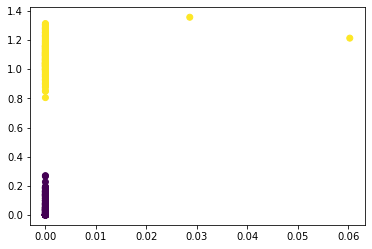

In [51]:
plt.scatter(codificado_2dim[:, 0],
            codificado_2dim[:, 1],
            c = y)

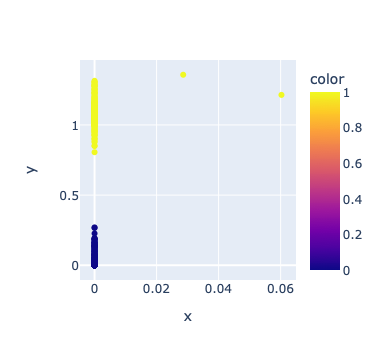

In [52]:
fig = px.scatter(x = codificado_2dim[:, 0], 
                 y = codificado_2dim[:, 1], 
                 color = y)
fig.show()